In [3]:
# Importing necessary Libraries
import warnings 
warnings.filterwarnings('ignore') 
import pandas as pd 
import re 
import seaborn as sns 
from sklearn.feature_extraction.text import TfidfVectorizer 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
import nltk 
nltk.download('stopwords') 
from nltk.corpus import stopwords
import langid
print("All libraries imported")

All libraries imported


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91798\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
!pip install langid

In [5]:
# Importing necessary Libraries
import warnings 
warnings.filterwarnings('ignore') 
import pandas as pd 
import re 
import seaborn as sns 
from sklearn.feature_extraction.text import TfidfVectorizer 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
import nltk 
nltk.download('stopwords') 
from nltk.corpus import stopwords
import langid
print("All libraries imported")

All libraries imported


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91798\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
#importing the data file of reviews of a specific client brand
data = pd.read_csv('Final fuel.csv') 
data.head()

,text,Sentiment
0,What does negative price of crude oil means?,-0.534077
1,@realDonaldTrump Have you seen the price oil K...,-0.337025
2,Western Canadian Select future in Minus first ...,-0.065357
3,Goodness gracious me.. What a day to be alive....,-0.326590
4,@Hiddemhigh https://t.co/i6LuhfWCnJ,-0.374404


In [7]:
# Load your CSV file into a DataFrame
file_path = 'Final fuel.csv'
df = pd.read_csv(file_path)

# Function to filter non-English comments
def is_english(text):
    if pd.isna(text):  # Handle NaN values
        return False
    try:
        lang, _ = langid.classify(text)
        return lang == 'en'
    except Exception as e:
        print(f"Error classifying language for '{text}': {e}")
        return False

# Apply the filter to the 'text' column
df['is_english'] = df['text'].apply(is_english)

# Filter out non-English comments
english_comments_df = df[df['is_english']]

# Drop the additional column used for filtering
english_comments_df = english_comments_df.drop(columns=['is_english'])

# Save the filtered DataFrame to a new CSV file or use it as needed
english_comments_df.to_csv('Final fuel.csv', index=False)
print ("English comments filtered")

English comments filtered


In [8]:
english_comments_df.head()

,text,Sentiment
0,What does negative price of crude oil means?,-0.534077
1,@realDonaldTrump Have you seen the price oil K...,-0.337025
2,Western Canadian Select future in Minus first ...,-0.065357
3,Goodness gracious me.. What a day to be alive....,-0.326590
4,@Hiddemhigh https://t.co/i6LuhfWCnJ,-0.374404


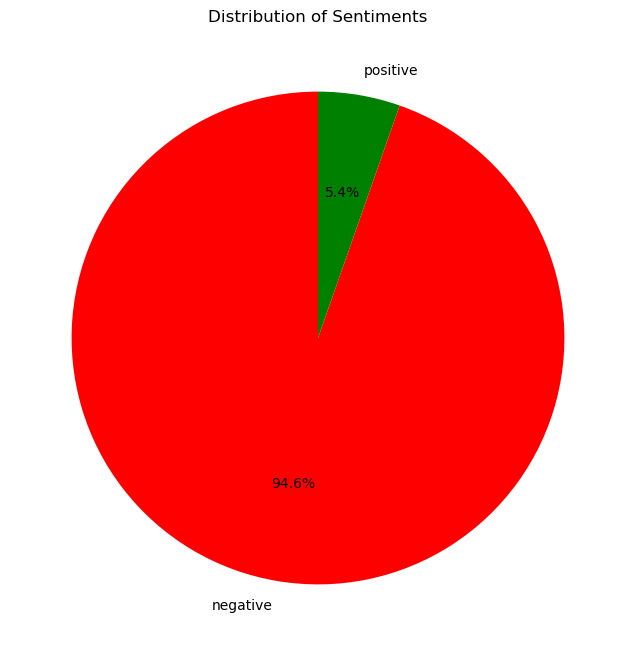

In [9]:
threshold = 0.0  

# Categorize sentiments as positive or negative
english_comments_df['sentiment_category'] = english_comments_df['Sentiment'].apply(lambda x: 'positive' if x >= threshold else 'negative')

# Count the number of positive and negative sentiments
sentiment_category_counts = english_comments_df['sentiment_category'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_category_counts, labels=sentiment_category_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title('Distribution of Sentiments')
plt.show()

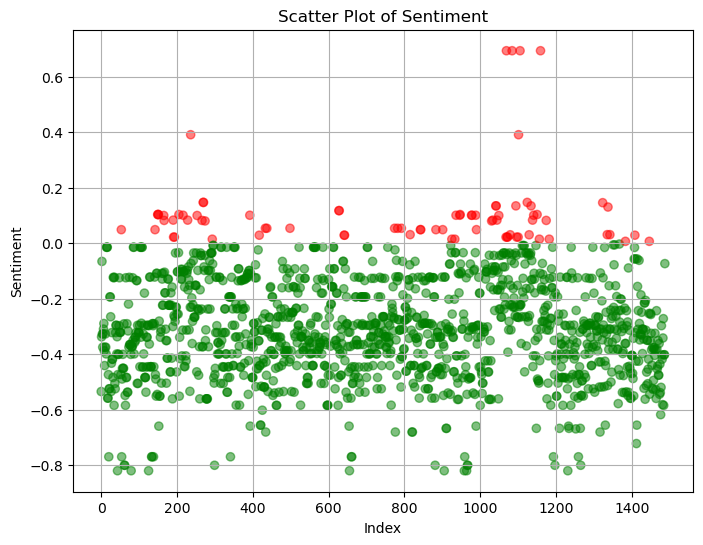

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_path = 'Final fuel.csv'
df = pd.read_csv(file_path)

# Define colors for positive and negative sentiments
colors = ['green' if sentiment < 0 else 'red' for sentiment in df['Sentiment']]

# Plot a scatter graph
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['Sentiment'], color=colors, alpha=0.5)  # Assuming 'Sentiment' is the column name
plt.title('Scatter Plot of Sentiment')
plt.xlabel('Index')
plt.ylabel('Sentiment')
plt.grid(True)  # Show gridlines
plt.show()


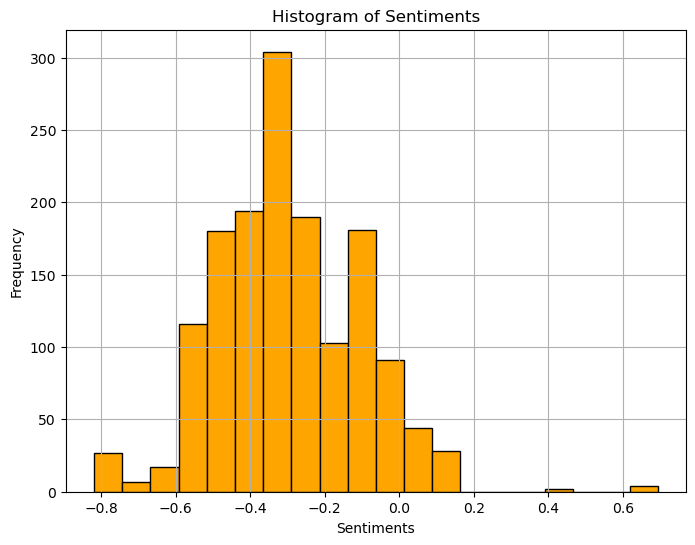

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_path = 'Final fuel.csv'
df = pd.read_csv(file_path)

# Plot a histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Sentiment'], bins=20, color='orange', edgecolor='black')
plt.title('Histogram of Sentiments')
plt.xlabel('Sentiments')
plt.ylabel('Frequency')
plt.grid(True)  # Show gridlines
plt.show()



In [12]:
pos_neg = [] 
for i in range(len(data['Sentiment'])): 
	if data['Sentiment'][i] >= 0.0: 
		pos_neg.append(1) 
	else: 
		pos_neg.append(0) 

data['label'] = pos_neg 

In [13]:
# Display the total number of comments after filtering
total_comments_after_filter = len(english_comments_df)
print(f'Total number of comments after filtering: {total_comments_after_filter}')

Total number of comments after filtering: 1488


In [14]:
data.head()

,text,Sentiment,label
0,What does negative price of crude oil means?,-0.534077,0
1,@realDonaldTrump Have you seen the price oil K...,-0.337025,0
2,Western Canadian Select future in Minus first ...,-0.065357,0
3,Goodness gracious me.. What a day to be alive....,-0.326590,0
4,@Hiddemhigh https://t.co/i6LuhfWCnJ,-0.374404,0


In [15]:
from tqdm import tqdm 
def preprocess_text(text_data): 
	preprocessed_text = [] 

	for sentence in tqdm(text_data): 
		if isinstance(sentence, float):
			# Handle float values, convert them to strings
			sentence = str(sentence)
		# Removing punctuations 
		sentence = re.sub(r'[^\w\s\f]', '', sentence) 

		# Converting lowercase and removing stopwords 
		preprocessed_text.append(' '.join(token.lower() 
										for token in nltk.word_tokenize(sentence) 
										if token.lower() not in stopwords.words('english'))) 

	return preprocessed_text 
print ("Text Preprocessed")

Text Preprocessed


In [16]:
preprocessed_review = preprocess_text(data['text'].values) 
data['text'] = preprocessed_review

100%|██████████| 1488/1488 [00:15<00:00, 98.50it/s] 


In [17]:
data["label"].value_counts()

label
0    1408
1      80
Name: count, dtype: int64

In [18]:
cv = TfidfVectorizer(max_features=2500) 
X = cv.fit_transform(data['text'] ).toarray()

In [19]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], 
													test_size=0.58, 
													stratify=data['label'], 
													random_state = 42)

In [21]:
print("Decision Tree Accuracy Score:")
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(random_state=0) 
model.fit(X_train,y_train) 

#testing the model 
pred = model.predict(X_train) 
print(accuracy_score(y_train,pred))

Decision Tree Accuracy Score:
0.9743589743589743


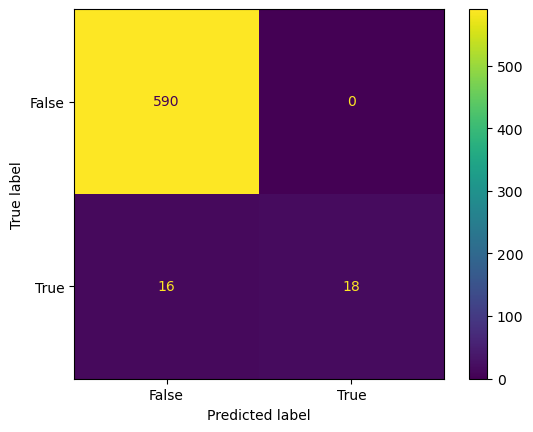

In [22]:
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_train,pred) 

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, 
											display_labels = [False, True]) 

cm_display.plot() 
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, data['label'], 
													test_size=0.60, 
													stratify=data['label'], 
													random_state = 42)

In [24]:
print("Logistic Regression Accuracy Score:")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
#Model fitting
model.fit(x_train,y_train)
#testing the model
pred=model.predict(x_test)
#model accuracy
print(accuracy_score(y_test,pred))

Logistic Regression Accuracy Score:
0.9462486002239642


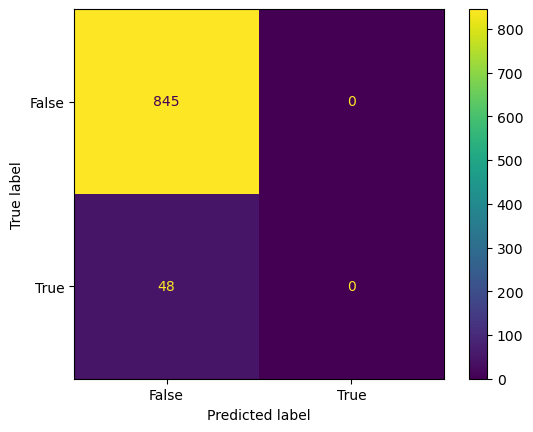

In [29]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, 
											display_labels = [False, True])

cm_display.plot()
plt.show()

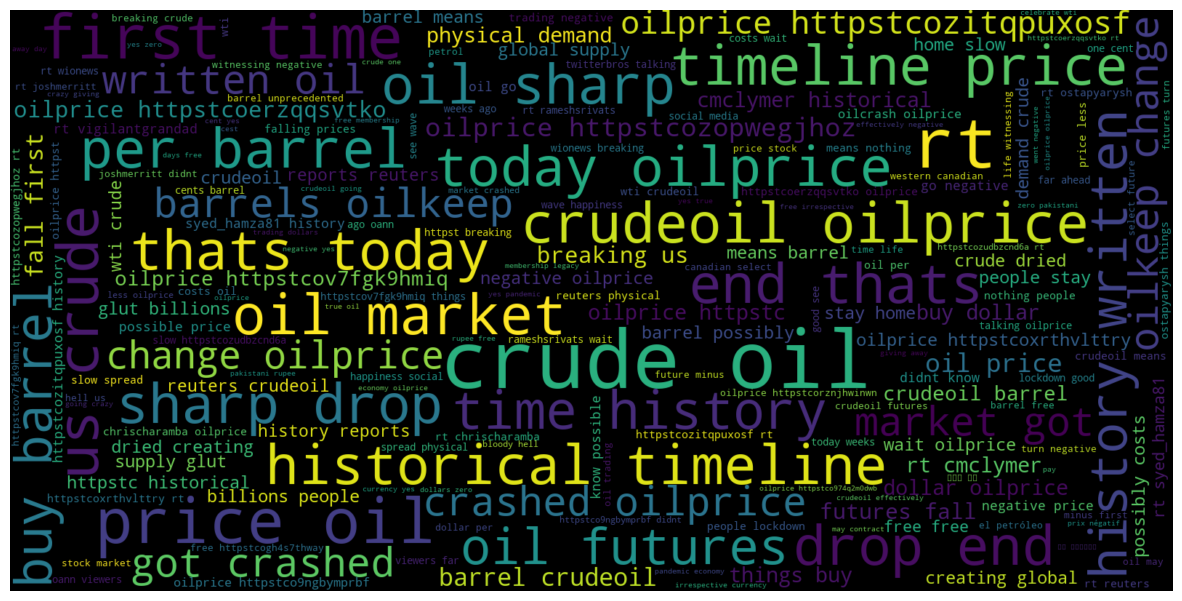

In [23]:
consolidated = ' '.join( 
	word for word in data['text'][data['label'] == 0].astype(str)) 
wordCloud = WordCloud(width=1600, height=800, 
					random_state=21, max_font_size=110) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show() 

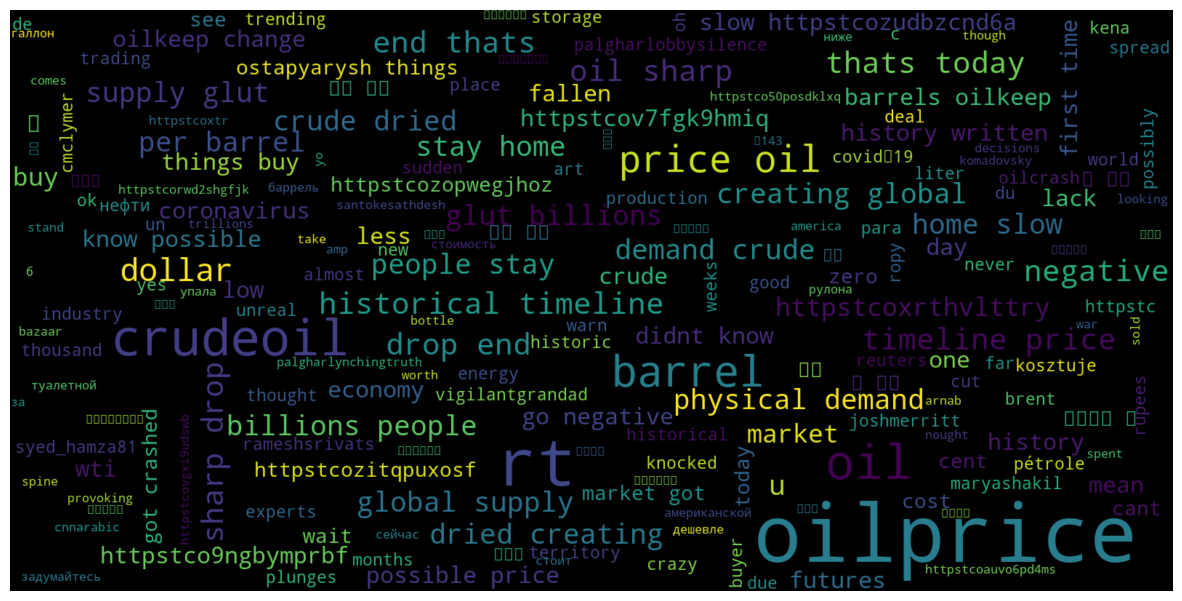

In [24]:
consolidated = ' '.join( 
	word for word in data['text'][data['label'] == 1].astype(str)) 
wordCloud = WordCloud(width=1600, height=800
                      , 
					random_state=21, max_font_size=110) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show() 